## GPU Implementations of Python Zernike module
- Based on Direct polynomial solving

In [1]:
import numpy as np
import skimage as ski
import tifffile as tif
import matplotlib.pyplot as plt

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
img = tif.imread('back_pre_fit.tiff')

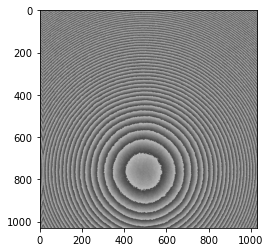

In [3]:
plt.imshow(img, cmap='gray')

Reference Implementation

In [4]:
# !pip install zernike
from zernike import RZern

# Fitting an image with Zernike polynomials
cart = RZern(6)
ddx = np.linspace(-1.0, 1.0, img.shape[1])
ddy = np.linspace(-1.0, 1.0, img.shape[0])
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv, unit_circle=False)
fit1 = cart.fit_cart_grid(img)[0]

Phi = cart.eval_grid(fit1, matrix=True)
Phi[np.isnan(Phi)] = 0

Pytorch Implementation

In [91]:
import torch
from zern_torch import RZern

In [105]:
# Fitting an image with Zernike polynomials of degree 6
cart = RZern(6, device='cuda:0')
ddx = torch.linspace(-1.0, 1.0, img.shape[1]).to('cuda:0')
ddy = torch.linspace(-1.0, 1.0, img.shape[0]).to('cuda:0')
xv, yv = torch.meshgrid(ddx, ddy, indexing='ij')
cart.make_cart_grid(xv, yv, unit_circle=True)
fit1 = cart.fit_cart_grid(torch.tensor(img, device='cuda:0'))[0]
Phi = cart.eval_grid(fit1, matrix=True)
# Phi[torch.isnan(Phi)] = 0

In [74]:
def fit_and_eval(cart, img):
    fit1 = cart.fit_cart_grid(torch.tensor(img, device='cuda:0'))[0]
    Phi = cart.eval_grid(fit1, matrix=True)
    return fit1, Phi

In [76]:
# Speed Test
_ = fit_and_eval(cart, img)
%timeit -n 100 fit_and_eval(cart, img)

2.17 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


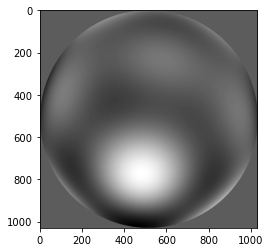

In [102]:
plt.imshow(Phi.detach().cpu().numpy(), cmap='gray')

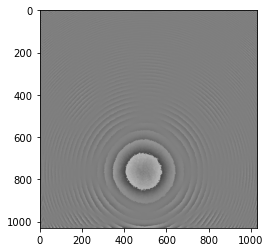

In [106]:
plt.imshow(Phi.detach().cpu().numpy()*img, cmap='gray')

In [4]:
import cupy as cp
from zern_cupy import RZern

In [ ]:
cart = RZern(6)
ddx = cp.linspace(-1.0, 1.0, img.shape[1])
ddy = cp.linspace(-1.0, 1.0, img.shape[0])
xv, yv = cp.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv, unit_circle=False)
fit1 = cart.fit_cart_grid(img)[0]

Phi = cart.eval_grid(fit1, matrix=True)
Phi[cp.isnan(Phi)] = 0

### Histogram Comparison before and after Fitting

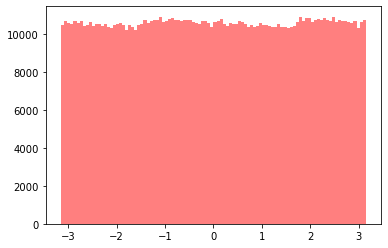

In [7]:
# pre-fitted
count, bins = np.histogram(img, bins=100)
plt.stairs(count, bins, fill=True, color='r', alpha=0.5)

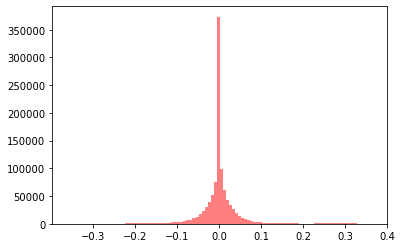

In [8]:
# Post fitting
count, bins = np.histogram(img*Phi, bins=100)
plt.stairs(count, bins, fill=True, color='r', alpha=0.5)